In [1]:
%matplotlib inline
#import seaborn
import numpy 
import scipy
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (14, 5)

# Energy and RMSE

The **energy** ([Wikipedia](https://en.wikipedia.org/wiki/Energy_(signal_processing%29); FMP, p. 66) of a signal corresponds to the total magntiude of the signal. For audio signals, that roughly corresponds to how loud the signal is. The energy in a signal is defined as

$$ \sum_n \left| x(n) \right|^2 $$

The **root-mean-square energy (RMSE)** in a signal is defined as

$$ \sqrt{ \frac{1}{N} \sum_n \left| x(n) \right|^2 } $$

Let's load a signal:

In [5]:
x, sr = librosa.load('wav/test/6 by 1_14_16_17_19_20_1.wav')

Listen to the signal:

In [6]:
ipd.Audio(x, rate=sr)

Plot the signal:

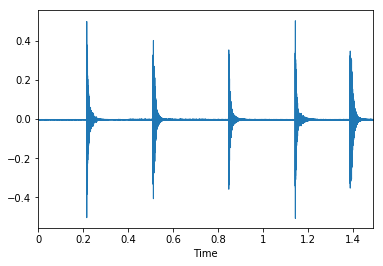

In [7]:
librosa.display.waveplot(x, sr=sr)

Compute the short-time energy using a list comprehension:

In [8]:
hop_length = 256
frame_length = 1024

In [9]:
energy = numpy.array([
    sum(abs(x[i:i+frame_length]**2))
    for i in range(0, len(x), hop_length)
])

In [10]:
energy.shape

(129,)

Compute the RMSE using [`librosa.feature.rmse`](https://librosa.github.io/librosa/generated/librosa.feature.rmse.html):

In [11]:
rmse = librosa.feature.rmse(x, frame_length=frame_length, hop_length=hop_length)[0]

In [12]:
rmse.shape

(129,)

Plot both the energy and RMSE along with the waveform:

In [13]:
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

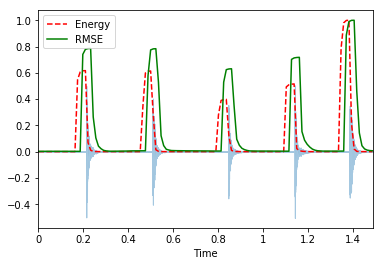

In [14]:
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, energy/energy.max(), 'r--')             # normalized for visualization
plt.plot(t[:len(rmse)], rmse/rmse.max(), color='g') # normalized for visualization
plt.legend(('Energy', 'RMSE'))

## Questions

Write a function, `strip`, that removes leading and trailing silence from a signal. Make sure it works for a variety of signals recorded in different environments and with different signal-to-noise ratios (SNR).

[&larr; Back to Index](index.html)